In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [20]:
# Assuming your dataset is loaded into a DataFrame
data = pd.read_csv('Jac_Training_data.csv')
data = data.rename(columns={'Enzyme_Sim': 'Temp', 'Carrier_Sim': 'Enzyme_Sim'})
data = data.rename(columns={'Temp': 'Carrier_Sim'})
data

,DrugID,DDI,Label,Enzyme_Sim,Transporter_Sim,Carrier_Sim,Target_Sim,SE_Sim,Off_Sim,Chemsub_Sim
0,DB00983,DB01171,1,0.0,0.0,0.272727,0.0,0.181818,0.096856,0.216000
1,DB00833,DB00225,1,0.0,0.0,0.000000,0.0,0.203704,0.336830,0.154286
2,DB00489,DB00486,1,0.0,0.0,0.000000,0.0,0.225532,0.128596,0.181102
3,DB00575,DB00749,1,1.0,0.0,0.000000,0.0,0.215232,0.432683,0.083770
4,DB00193,DB00627,1,0.0,0.0,0.400000,0.0,0.165217,0.464407,0.151515
...,...,...,...,...,...,...,...,...,...,...
251754,DB00873,DB00254,0,0.0,0.0,0.000000,0.0,0.024510,0.002949,0.239796
251755,DB00873,DB00615,0,0.0,0.0,0.000000,0.0,0.036364,0.011587,0.126801
251756,DB00873,DB00198,0,0.0,0.0,0.000000,0.0,0.039216,0.004545,0.284672
251757,DB00873,DB01083,0,0.0,0.0,0.000000,0.0,0.030457,0.003589,0.271845


In [21]:
fraction = 1 / 40  # 1/20 of the dataset
sampled_data = data.sample(frac=fraction, random_state=42)

# Features and target from the sampled data
X_sampled = sampled_data[['Carrier_Sim', 'Transporter_Sim', 'Enzyme_Sim', 'Target_Sim', 'SE_Sim', 'Off_Sim', 'Chemsub_Sim']]
y_sampled = sampled_data['Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

In [22]:
# Train a RandomForest model
model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

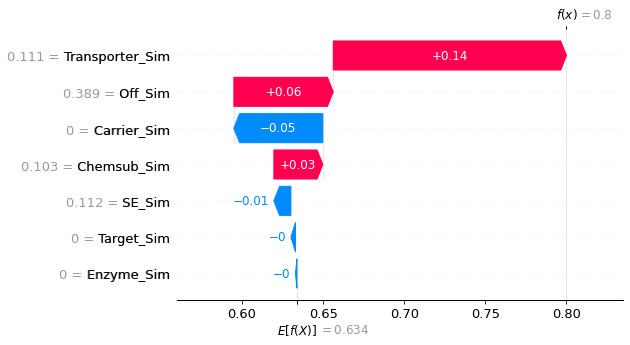

In [23]:
# # Take a random subset of the test data for SHAP
# subset_size = 1000  # Adjust the size of the subset as needed
# subset_indices = np.random.choice(X_test.index, subset_size, replace=False)
# X_test_subset = X_test.loc[subset_indices]

# Use SHAP to explain the model on the subset
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
# shap_values = explainer.shap_values(X_test_subset)

# # Plot feature importance
# shap.summary_plot(shap_values[1], X_test_subset)
# Select a single sample for the waterfall plot

sample_index = 0  # Change this to select a different sample
shap_values_single = shap_values[1][sample_index]
X_test_single = X_test.iloc[sample_index]

# Generate the waterfall plot
shap.waterfall_plot(shap.Explanation(values=shap_values_single, base_values=explainer.expected_value[1], data=X_test_single))

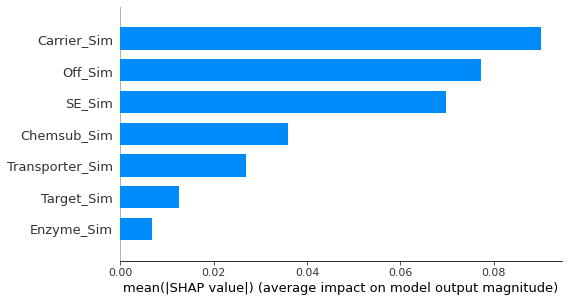

In [24]:
# Generate the bar chart for overall feature importance
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

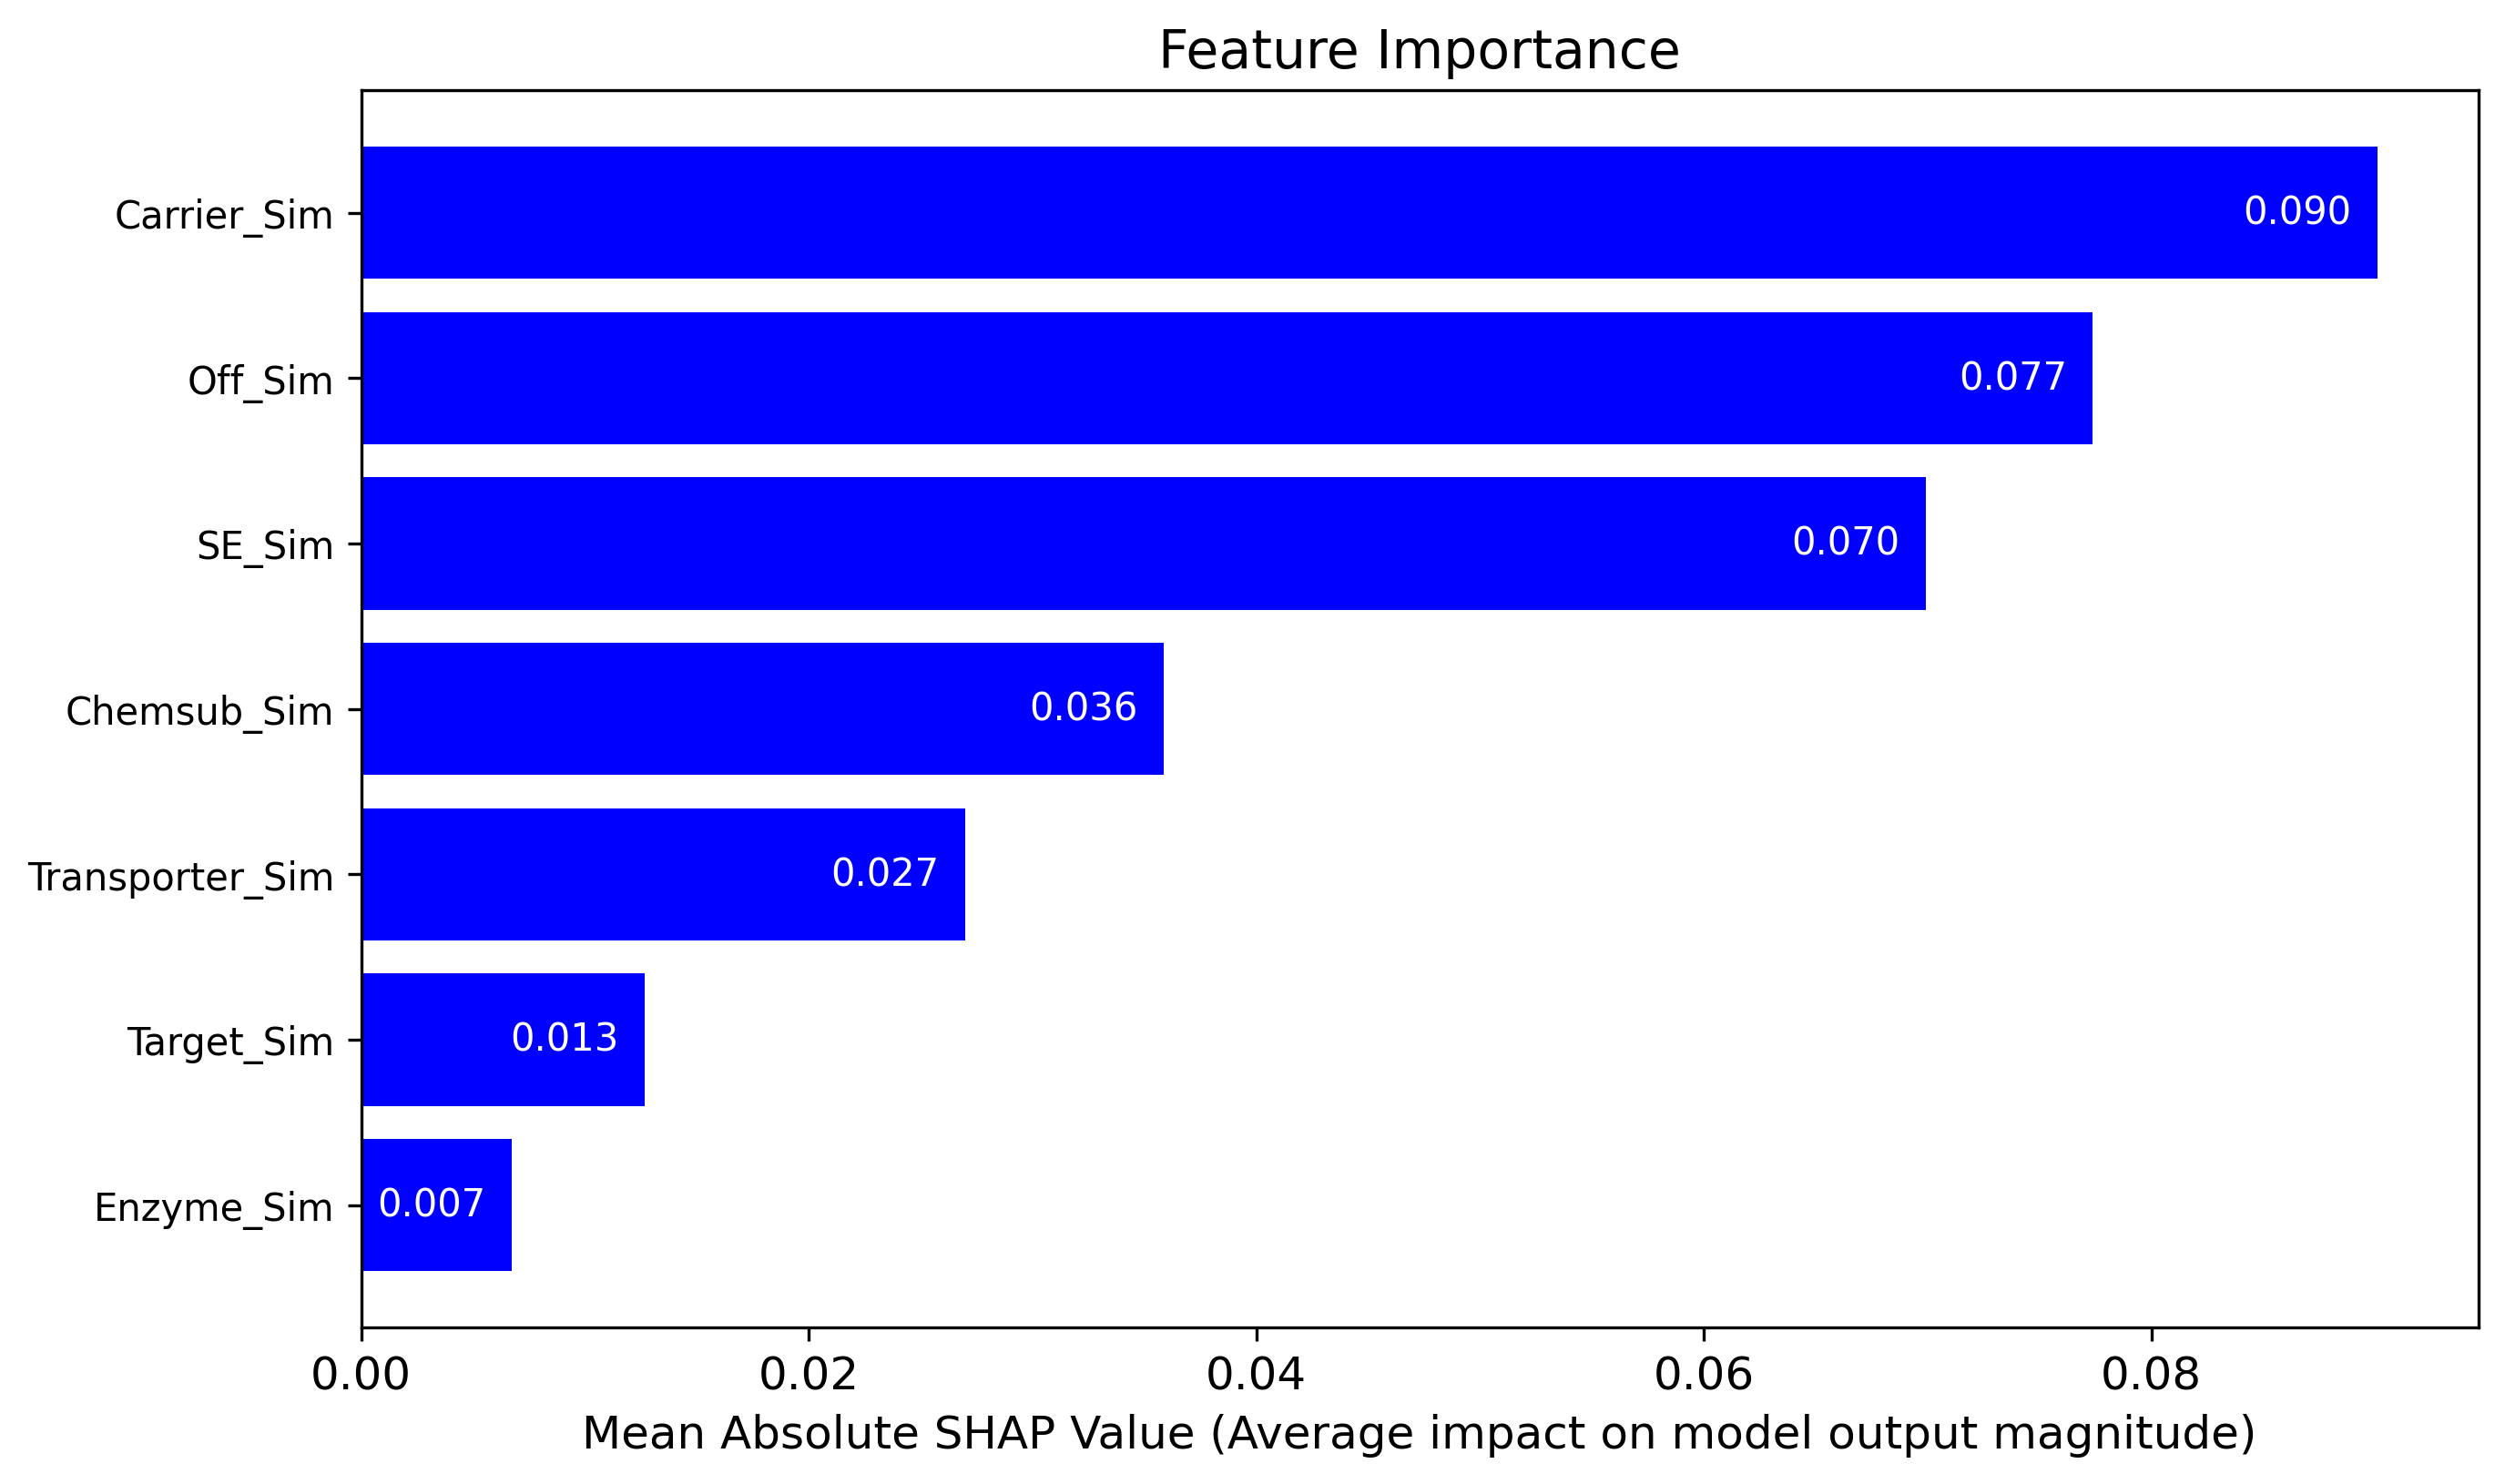

In [46]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Compute mean absolute SHAP values for each feature
shap_values_mean = np.abs(shap_values[1]).mean(axis=0)
feature_names = X_test.columns

# Create a DataFrame for the SHAP values
shap_df = pd.DataFrame({'Feature': feature_names, 'Mean SHAP Value': shap_values_mean})

# Sort the DataFrame by mean SHAP value
shap_df = shap_df.sort_values(by='Mean SHAP Value', ascending=False)

# Plot the bar chart with values annotated
plt.figure(figsize=(10, 6), dpi=300)  # Increased figure size and resolution
bars = plt.barh(shap_df['Feature'], shap_df['Mean SHAP Value'], color='blue')  # Darker color for bars
plt.xlabel('Mean Absolute SHAP Value (Average impact on model output magnitude)', fontsize=12)  # Larger font size for labels
plt.title('Feature Importance', fontsize=14)  # Larger font size for title

# Annotate the bars with the mean SHAP values
for bar in bars:
    width = bar.get_width()
    plt.text(width - 0.006, bar.get_y() + bar.get_height() / 2, f'{width:.3f}', va='center', fontsize=10, color='white')  # Closer annotations

plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.xticks(fontsize=12)  # Larger font size for x-axis ticks
plt.yticks(fontsize=10)  # Larger font size for y-axis ticks

# Save the plot as a high-resolution image
plt.savefig('feature_importance_hd.jpeg', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()
